The following code trains and tests models on the Cat Recognition dataset with varying Train Dataset Sizes, and then plots a graph of Test Prediction Accuracy against Train Dataset Size.

'Progress: Complete'

Regression Line Gradient: 0.18


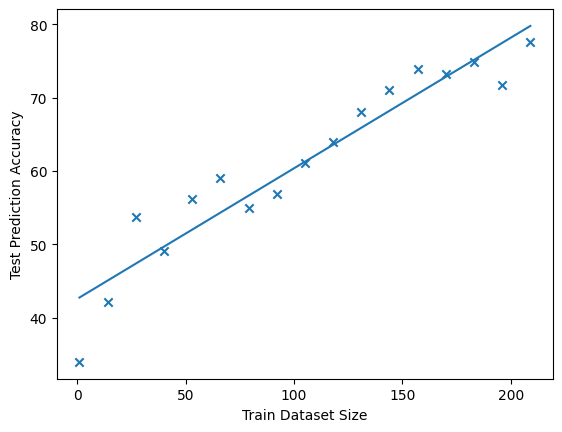

In [17]:
from IPython.display import clear_output, display
import os

import matplotlib.pyplot as plt
import numpy as np

from school_project.models.gpu.cat_recognition import CatRecognitionModel as Model

os.chdir(os.getcwd())  # Change to root directory of project


# Generate list of train dataset sizes from 1 to 210, incremented by 13
train_dataset_sizes = np.array(list(range(1, 210, 13))) 

test_prediction_accuracies = np.array([])

for index, train_dataset_size in enumerate(train_dataset_sizes):
    clear_output(wait=True)
    display(f"Progress: {round(number=index/len(train_dataset_sizes) * 100, ndigits=2)}%")

    model = Model(hidden_layers_shape=[100, 100],
                  train_dataset_size=train_dataset_size,
                  learning_rate=0.1,
                  use_relu=True)
    model.create_model_values()
    model.train(epoch_count=2_000)
    model.test()

    test_prediction_accuracies = np.append(test_prediction_accuracies, 
                                           model.test_prediction_accuracy)
    
clear_output(wait=True)
display(f"Progress: Complete")

# Determine gradient and y-intercept of regression line
m, c = np.polyfit(train_dataset_sizes, test_prediction_accuracies, deg=1)
print(f"Regression Line Gradient: {round(number=m, ndigits=2)}")

plt.xlabel("Train Dataset Size")
plt.ylabel("Test Prediction Accuracy")

# Plot scatter graph of train dataset sizes and prediction accuracies
plt.scatter(train_dataset_sizes, test_prediction_accuracies, marker='x')

# Plot regression line
plt.plot(train_dataset_sizes, m * train_dataset_sizes + c)

plt.show()